In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys


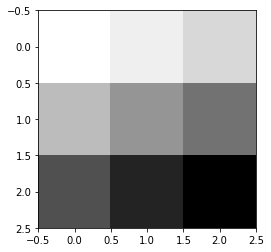

In [2]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
image.shape
# 3*3*1*1 이미지 준비, 2*2*1 필터 준비
plt.imshow(image.reshape(3,3), cmap='Greys') 
#matplotlib  에서 이미지 뿌리려면 2차원으로 맞춰워야 하는데 지금은 4차원. reshape로 맞춰

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
차원 변경: [[12. 16.]
 [24. 28.]]


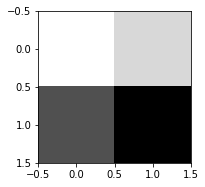

In [3]:
# padding 없이 convolution layer 추출
#원래 학습된 weight가 들어가는데 임의상 입력함
filter = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
filter

#원본이미지와 필터로 이미지 레이어 하나 만드는것
# strides = 첫번쨰와 4번쨰는 좌우 1 고정 가운데 2,3번째가 1x1 옮기는것
# valid 패딩을 안쓰겠다.
conv2d = tf.nn.conv2d(image, filter, strides = [1, 1, 1, 1], padding = 'VALID')

sess = tf.Session()
conv2d_img = sess.run(conv2d)
#크기가 3X3에서 2x2로 줄어들음
print(conv2d_img)
print(conv2d_img.shape)


conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap="Greys")

sess.close()


# 패딩을 사용한 convolution layer 추출


[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
(1, 3, 3, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
차원 변경: [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


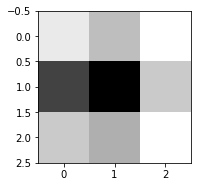

In [4]:
# pading = "SAME"
# padding 없이 convolution layer 추출
#원래 학습된 weight가 들어가는데 임의상 입력함
filter = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
filter

#원본이미지와 필터로 이미지 레이어 하나 만드는것
# strides = 첫번쨰와 4번쨰는 좌우 1 고정 가운데 2,3번째가 1x1 옮기는것

conv2d = tf.nn.conv2d(image, filter, strides = [1, 1, 1, 1], padding = 'SAME')

sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img)
print(conv2d_img.shape)


conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")

sess.close()


[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]
(1, 3, 3, 3)
축의 방향을 바꿈: [[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
차원 변경: [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
차원 변경: [[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
차원 변경: [[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


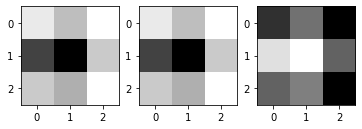

In [5]:
#3개의 필터 사용( 2*2*1*3)

# pading = "SAME"
# padding 없이 convolution layer 추출
#원래 학습된 weight가 들어가는데 임의상 입력함
filter = tf.constant([[[[1., 10., -1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
filter

#원본이미지와 필터로 이미지 레이어 하나 만드는것
# strides = 첫번쨰와 4번쨰는 좌우 1 고정 가운데 2,3번째가 1x1 옮기는것

conv2d = tf.nn.conv2d(image, filter, strides = [1, 1, 1, 1], padding = 'SAME')

sess = tf.Session()
conv2d_img = sess.run(conv2d)

print(conv2d_img)
print(conv2d_img.shape)


conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys")

sess.close()

In [6]:
# MaxPooling(2*2)
image2 = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
image2
# ksize = 커널사이즈는 필터의 크기
pool =  tf.nn.max_pool(image2, ksize = [1,2,2,1], strides = [1,1,1,1],
                      padding = "VALID")
sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)
sess.close()

(1, 1, 1, 1)
[[[[4.]]]]


# 사례 1 : MNIST 손글씨 예제


In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


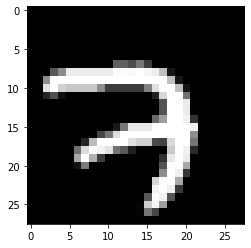

In [8]:
# 데이터 확인
img = mnist.train.images[0]
img.shape

plt.imshow(img.reshape(28,28), cmap = "gray")

In [9]:
# 입력값 준비
X = tf.placeholder(tf.float32, shape = [None, 784])
y = tf.placeholder(tf.float32, shape = [None, 10])

In [10]:
# 첫번째 Convolution Layer 작성
# 필터의 크기 : 3*3, 필터의 갯수 : 32, 색상 수 :1
# Pooling 필터의 크기 : 2*2, strides = 2*2 , pading 사용
X_img = tf.reshape(X, [-1,28,28,1]) # 크기알아서 조정해라 = -1
#1 은 색상수 1 의미한다. 
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.01))

L1 = tf.nn.conv2d(X_img, W1, strides = [1,1,1,1], padding = "SAME")
print(L1) #첫번째 컨볼루션 레이어 L1 준비
L1 = tf.nn.relu(L1)
print(L1)
L1=tf.nn.max_pool(L1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "SAME")
print(L1)

Tensor("Conv2D_3:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 14, 14, 32), dtype=float32)


In [11]:
# 필터의 개수 64개로 늘어남, 첫필터는 32개수이므로 
# 하나 더만들면 32가 아닌 64로 만들어줘야함
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
# 입력값으로 L1 을 받는다.
L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = "SAME")
print(L2) #두번째 컨볼루션 레이어 L2 준비
L2 = tf.nn.relu(L2)
print(L2)
L2=tf.nn.max_pool(L2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "SAME")
print(L2)

Tensor("Conv2D_4:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 7, 7, 64), dtype=float32)


In [12]:
# FC작성 (Fully Connected Layer, Dense Layer)
# L2 는  shape=(?, 14, 14, 64) 로 4차원이라 2차원으로 만들어줘야함
learning_rate = 0.001
training_epochs = 15
batch_size = 500

L2 = tf.reshape(L2, [-1, 7*7*64])

W3 = tf.Variable(tf.random_normal([7*7*64, 10]))
b1 = tf.Variable(tf.random_normal([10]))

logit = tf.matmul(L2, W3) + b1
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels = y)

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct = tf.equal(tf.arg_max(hypot, 1), tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, loss, acc = sess.run([train, tf.reduce_mean(cost), accuracy], 
                                feed_dict = {X : batch_xs, y : batch_ys})
        
        print("epoch: {:5}\tLoss: {:3}\tAcc: {}".format(epoch, loss, acc))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

epoch:     0	Loss: 2.5161101818084717	Acc: 0.09600000083446503
epoch:     0	Loss: 2.413909435272217	Acc: 0.11800000071525574
epoch:     0	Loss: 2.3801934719085693	Acc: 0.07400000095367432
epoch:     0	Loss: 2.277048349380493	Acc: 0.1420000046491623
epoch:     0	Loss: 2.2212207317352295	Acc: 0.20399999618530273
epoch:     0	Loss: 2.1727685928344727	Acc: 0.2160000056028366
epoch:     0	Loss: 2.0963637828826904	Acc: 0.2840000092983246
epoch:     0	Loss: 2.05169939994812	Acc: 0.3140000104904175
epoch:     0	Loss: 1.9880837202072144	Acc: 0.3580000102519989
epoch:     0	Loss: 1.9190362691879272	Acc: 0.4099999964237213
epoch:     0	Loss: 1.819578766822815	Acc: 0.4699999988079071
epoch:     0	Loss: 1.7877129316329956	Acc: 0.47200000286102295
epoch:     0	Loss: 1.6567007303237915	Acc: 0.5440000295639038
epo

epoch:     1	Loss: 0.19892317056655884	Acc: 0.9380000233650208
epoch:     1	Loss: 0.22556903958320618	Acc: 0.9380000233650208
epoch:     1	Loss: 0.1706562042236328	Acc: 0.9399999976158142
epoch:     1	Loss: 0.17179861664772034	Acc: 0.9559999704360962
epoch:     1	Loss: 0.15909640491008759	Acc: 0.949999988079071
epoch:     1	Loss: 0.127412810921669	Acc: 0.9639999866485596
epoch:     1	Loss: 0.18854893743991852	Acc: 0.9459999799728394
epoch:     1	Loss: 0.13807974755764008	Acc: 0.9639999866485596
epoch:     1	Loss: 0.1296842247247696	Acc: 0.9679999947547913
epoch:     1	Loss: 0.18028558790683746	Acc: 0.949999988079071
epoch:     1	Loss: 0.17250491678714752	Acc: 0.9380000233650208
epoch:     1	Loss: 0.13676384091377258	Acc: 0.9539999961853027
epoch:     1	Loss: 0.18056680262088776	Acc: 0.949999988079071
epoch:     1	Loss: 0.12810146808624268	Acc: 0.949999988079071
epoch:     1	Loss: 0.13991016149520874	Acc: 0.9559999704360962
epoch:     1	Loss: 0.19557538628578186	Acc: 0.9359999895095825


epoch:     2	Loss: 0.09130896627902985	Acc: 0.9739999771118164
epoch:     2	Loss: 0.12610776722431183	Acc: 0.9559999704360962
epoch:     2	Loss: 0.11716839671134949	Acc: 0.9580000042915344
epoch:     2	Loss: 0.07672987878322601	Acc: 0.9739999771118164
epoch:     2	Loss: 0.0815264880657196	Acc: 0.9700000286102295
epoch:     2	Loss: 0.14515367150306702	Acc: 0.949999988079071
epoch:     2	Loss: 0.1402570605278015	Acc: 0.9639999866485596
epoch:     2	Loss: 0.13301223516464233	Acc: 0.9639999866485596
epoch:     2	Loss: 0.08569733798503876	Acc: 0.9639999866485596
epoch:     2	Loss: 0.10386558622121811	Acc: 0.9779999852180481
epoch:     2	Loss: 0.11789662390947342	Acc: 0.9620000123977661
epoch:     2	Loss: 0.1018240824341774	Acc: 0.9679999947547913
epoch:     2	Loss: 0.13298165798187256	Acc: 0.9599999785423279
epoch:     2	Loss: 0.10399648547172546	Acc: 0.9679999947547913
epoch:     2	Loss: 0.11165186762809753	Acc: 0.9700000286102295
epoch:     2	Loss: 0.09642404317855835	Acc: 0.9599999785423

epoch:     3	Loss: 0.09582417458295822	Acc: 0.9660000205039978
epoch:     3	Loss: 0.06258627772331238	Acc: 0.9879999756813049
epoch:     3	Loss: 0.10364962369203568	Acc: 0.9679999947547913
epoch:     3	Loss: 0.0861692726612091	Acc: 0.9679999947547913
epoch:     3	Loss: 0.10057729482650757	Acc: 0.9679999947547913
epoch:     3	Loss: 0.09513585269451141	Acc: 0.9760000109672546
epoch:     3	Loss: 0.08247246593236923	Acc: 0.972000002861023
epoch:     3	Loss: 0.07588455826044083	Acc: 0.9700000286102295
epoch:     3	Loss: 0.06214246153831482	Acc: 0.9819999933242798
epoch:     3	Loss: 0.11298499256372452	Acc: 0.9620000123977661
epoch:     3	Loss: 0.09464645385742188	Acc: 0.9739999771118164
epoch:     3	Loss: 0.08482486754655838	Acc: 0.9800000190734863
epoch:     3	Loss: 0.0786716565489769	Acc: 0.9779999852180481
epoch:     3	Loss: 0.10159466415643692	Acc: 0.972000002861023
epoch:     3	Loss: 0.08035014569759369	Acc: 0.9800000190734863
epoch:     3	Loss: 0.0731557235121727	Acc: 0.97799998521804

epoch:     4	Loss: 0.0823902040719986	Acc: 0.972000002861023
epoch:     4	Loss: 0.07216648757457733	Acc: 0.9739999771118164
epoch:     4	Loss: 0.09110836684703827	Acc: 0.9599999785423279
epoch:     4	Loss: 0.11183503270149231	Acc: 0.9819999933242798
epoch:     4	Loss: 0.07258376479148865	Acc: 0.9779999852180481
epoch:     4	Loss: 0.06591463834047318	Acc: 0.9800000190734863
epoch:     4	Loss: 0.07170823216438293	Acc: 0.9819999933242798
epoch:     4	Loss: 0.058246176689863205	Acc: 0.9819999933242798
epoch:     4	Loss: 0.08364372700452805	Acc: 0.9679999947547913
epoch:     4	Loss: 0.06294625997543335	Acc: 0.9779999852180481
epoch:     4	Loss: 0.0664491280913353	Acc: 0.9760000109672546
epoch:     4	Loss: 0.0468854196369648	Acc: 0.9879999756813049
epoch:     4	Loss: 0.07772117108106613	Acc: 0.9779999852180481
epoch:     4	Loss: 0.04804004728794098	Acc: 0.9900000095367432
epoch:     4	Loss: 0.08125276118516922	Acc: 0.9679999947547913
epoch:     4	Loss: 0.09783143550157547	Acc: 0.970000028610

epoch:     5	Loss: 0.0414222776889801	Acc: 0.9940000176429749
epoch:     5	Loss: 0.09780170768499374	Acc: 0.9660000205039978
epoch:     5	Loss: 0.0782594084739685	Acc: 0.9819999933242798
epoch:     5	Loss: 0.06745253503322601	Acc: 0.9800000190734863
epoch:     5	Loss: 0.05350799858570099	Acc: 0.9800000190734863
epoch:     5	Loss: 0.05031054839491844	Acc: 0.9860000014305115
epoch:     5	Loss: 0.04975232109427452	Acc: 0.9860000014305115
epoch:     6	Loss: 0.0508892759680748	Acc: 0.984000027179718
epoch:     6	Loss: 0.03853146359324455	Acc: 0.9879999756813049
epoch:     6	Loss: 0.05863051861524582	Acc: 0.984000027179718
epoch:     6	Loss: 0.05557631328701973	Acc: 0.9819999933242798
epoch:     6	Loss: 0.04553519934415817	Acc: 0.9860000014305115
epoch:     6	Loss: 0.06789927929639816	Acc: 0.9860000014305115
epoch:     6	Loss: 0.051100198179483414	Acc: 0.9860000014305115
epoch:     6	Loss: 0.03831075131893158	Acc: 0.9900000095367432
epoch:     6	Loss: 0.05903521180152893	Acc: 0.9840000271797

epoch:     7	Loss: 0.033167991787195206	Acc: 0.9940000176429749
epoch:     7	Loss: 0.05695554241538048	Acc: 0.9760000109672546
epoch:     7	Loss: 0.06110280007123947	Acc: 0.9819999933242798
epoch:     7	Loss: 0.03978770971298218	Acc: 0.9900000095367432
epoch:     7	Loss: 0.038261253386735916	Acc: 0.984000027179718
epoch:     7	Loss: 0.0752205103635788	Acc: 0.9819999933242798
epoch:     7	Loss: 0.048925887793302536	Acc: 0.9860000014305115
epoch:     7	Loss: 0.04080609232187271	Acc: 0.9860000014305115
epoch:     7	Loss: 0.07156726717948914	Acc: 0.9800000190734863
epoch:     7	Loss: 0.036512747406959534	Acc: 0.9860000014305115
epoch:     7	Loss: 0.048361845314502716	Acc: 0.9860000014305115
epoch:     7	Loss: 0.03045468032360077	Acc: 0.9879999756813049
epoch:     7	Loss: 0.08096937090158463	Acc: 0.9760000109672546
epoch:     7	Loss: 0.057881370186805725	Acc: 0.984000027179718
epoch:     7	Loss: 0.06588289141654968	Acc: 0.9779999852180481
epoch:     7	Loss: 0.028650740161538124	Acc: 0.99000

epoch:     8	Loss: 0.02839062176644802	Acc: 0.9900000095367432
epoch:     8	Loss: 0.05229629948735237	Acc: 0.9800000190734863
epoch:     8	Loss: 0.07422331720590591	Acc: 0.984000027179718
epoch:     8	Loss: 0.04450109601020813	Acc: 0.9879999756813049
epoch:     8	Loss: 0.0370628722012043	Acc: 0.9919999837875366
epoch:     8	Loss: 0.0731109082698822	Acc: 0.9779999852180481
epoch:     8	Loss: 0.050328757613897324	Acc: 0.9860000014305115
epoch:     8	Loss: 0.035467423498630524	Acc: 0.9900000095367432
epoch:     8	Loss: 0.05563550069928169	Acc: 0.9779999852180481
epoch:     8	Loss: 0.05363788083195686	Acc: 0.9819999933242798
epoch:     8	Loss: 0.037682678550481796	Acc: 0.9879999756813049
epoch:     8	Loss: 0.03520021215081215	Acc: 0.9900000095367432
epoch:     8	Loss: 0.03250110149383545	Acc: 0.9919999837875366
epoch:     8	Loss: 0.05674608051776886	Acc: 0.9800000190734863
epoch:     8	Loss: 0.038130830973386765	Acc: 0.9900000095367432
epoch:     8	Loss: 0.0599665567278862	Acc: 0.986000001

epoch:     9	Loss: 0.03973241522908211	Acc: 0.9879999756813049
epoch:     9	Loss: 0.03373407572507858	Acc: 0.9919999837875366
epoch:     9	Loss: 0.028424015268683434	Acc: 0.9919999837875366
epoch:     9	Loss: 0.030292443931102753	Acc: 0.9860000014305115
epoch:     9	Loss: 0.04785674065351486	Acc: 0.9860000014305115
epoch:     9	Loss: 0.048002783209085464	Acc: 0.984000027179718
epoch:     9	Loss: 0.04142652079463005	Acc: 0.9879999756813049
epoch:     9	Loss: 0.08171804249286652	Acc: 0.984000027179718
epoch:     9	Loss: 0.036439280956983566	Acc: 0.9900000095367432
epoch:     9	Loss: 0.03377996385097504	Acc: 0.9900000095367432
epoch:     9	Loss: 0.050821710377931595	Acc: 0.9800000190734863
epoch:     9	Loss: 0.045336946845054626	Acc: 0.9879999756813049
epoch:     9	Loss: 0.03841564059257507	Acc: 0.9879999756813049
epoch:     9	Loss: 0.04130231961607933	Acc: 0.9919999837875366
epoch:     9	Loss: 0.04748327657580376	Acc: 0.9860000014305115
epoch:     9	Loss: 0.030387183651328087	Acc: 0.9940

epoch:    10	Loss: 0.036624662578105927	Acc: 0.9879999756813049
epoch:    10	Loss: 0.03765171021223068	Acc: 0.9860000014305115
epoch:    10	Loss: 0.04468614235520363	Acc: 0.984000027179718
epoch:    10	Loss: 0.024695083498954773	Acc: 0.9919999837875366
epoch:    10	Loss: 0.04442128911614418	Acc: 0.984000027179718
epoch:    10	Loss: 0.02194802090525627	Acc: 0.9900000095367432
epoch:    10	Loss: 0.019512996077537537	Acc: 0.9940000176429749
epoch:    10	Loss: 0.048164840787649155	Acc: 0.9819999933242798
epoch:    10	Loss: 0.03717904910445213	Acc: 0.9919999837875366
epoch:    10	Loss: 0.05387407913804054	Acc: 0.9819999933242798
epoch:    10	Loss: 0.051360879093408585	Acc: 0.9800000190734863
epoch:    10	Loss: 0.029841706156730652	Acc: 0.9919999837875366
epoch:    10	Loss: 0.029807113111019135	Acc: 0.9919999837875366
epoch:    10	Loss: 0.05702575668692589	Acc: 0.9819999933242798
epoch:    10	Loss: 0.031045401468873024	Acc: 0.9900000095367432
epoch:    10	Loss: 0.03639435023069382	Acc: 0.986

epoch:    11	Loss: 0.03563679754734039	Acc: 0.984000027179718
epoch:    11	Loss: 0.025102682411670685	Acc: 0.9900000095367432
epoch:    11	Loss: 0.04338992387056351	Acc: 0.9919999837875366
epoch:    11	Loss: 0.04476366564631462	Acc: 0.9919999837875366
epoch:    11	Loss: 0.054309602826833725	Acc: 0.9779999852180481
epoch:    11	Loss: 0.09090349078178406	Acc: 0.9739999771118164
epoch:    11	Loss: 0.05381800979375839	Acc: 0.9800000190734863
epoch:    11	Loss: 0.01013737078756094	Acc: 1.0
epoch:    11	Loss: 0.03410932049155235	Acc: 0.9879999756813049
epoch:    11	Loss: 0.06892075389623642	Acc: 0.9800000190734863
epoch:    11	Loss: 0.024185439571738243	Acc: 0.9900000095367432
epoch:    11	Loss: 0.046129994094371796	Acc: 0.984000027179718
epoch:    11	Loss: 0.017307743430137634	Acc: 0.9959999918937683
epoch:    11	Loss: 0.01746039092540741	Acc: 0.9940000176429749
epoch:    11	Loss: 0.03595983609557152	Acc: 0.9900000095367432
epoch:    11	Loss: 0.03285152465105057	Acc: 0.9900000095367432
epoc

epoch:    13	Loss: 0.030910255387425423	Acc: 0.9879999756813049
epoch:    13	Loss: 0.017471199855208397	Acc: 0.9959999918937683
epoch:    13	Loss: 0.039840005338191986	Acc: 0.9819999933242798
epoch:    13	Loss: 0.03201960399746895	Acc: 0.9919999837875366
epoch:    13	Loss: 0.019367139786481857	Acc: 0.9940000176429749
epoch:    13	Loss: 0.013878659345209599	Acc: 0.9959999918937683
epoch:    13	Loss: 0.027506135404109955	Acc: 0.9919999837875366
epoch:    13	Loss: 0.034079354256391525	Acc: 0.9879999756813049
epoch:    13	Loss: 0.04869251698255539	Acc: 0.984000027179718
epoch:    13	Loss: 0.03437536954879761	Acc: 0.9879999756813049
epoch:    13	Loss: 0.011704595759510994	Acc: 0.9980000257492065
epoch:    13	Loss: 0.048987459391355515	Acc: 0.9879999756813049
epoch:    13	Loss: 0.023196250200271606	Acc: 0.9940000176429749
epoch:    13	Loss: 0.05288366228342056	Acc: 0.9860000014305115
epoch:    13	Loss: 0.03234201297163963	Acc: 0.9900000095367432
epoch:    13	Loss: 0.021976588293910027	Acc: 0

epoch:    14	Loss: 0.025544429197907448	Acc: 0.9900000095367432
epoch:    14	Loss: 0.019534680992364883	Acc: 0.9980000257492065
epoch:    14	Loss: 0.02931308001279831	Acc: 0.9900000095367432
epoch:    14	Loss: 0.020002584904432297	Acc: 0.9940000176429749
epoch:    14	Loss: 0.03898610919713974	Acc: 0.9919999837875366
epoch:    14	Loss: 0.034522999078035355	Acc: 0.9959999918937683
epoch:    14	Loss: 0.017045773565769196	Acc: 0.9940000176429749
epoch:    14	Loss: 0.02592070959508419	Acc: 0.9900000095367432
epoch:    14	Loss: 0.009323159232735634	Acc: 1.0
epoch:    14	Loss: 0.022505495697259903	Acc: 0.9940000176429749
epoch:    14	Loss: 0.015984004363417625	Acc: 0.9940000176429749
epoch:    14	Loss: 0.059557218104600906	Acc: 0.9819999933242798
epoch:    14	Loss: 0.03452687710523605	Acc: 0.9919999837875366
epoch:    14	Loss: 0.03260467201471329	Acc: 0.9860000014305115
epoch:    14	Loss: 0.04980103299021721	Acc: 0.984000027179718
epoch:    14	Loss: 0.0240082535892725	Acc: 0.9940000176429749


In [13]:
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images, 
                                             y:mnist.test.labels}))

정확도 :  0.9845


# 배치처리 직접 작성
## 인덱스를 끈어서 가져온다500 개씩 끈어서 가져오기
 -   batch_xs, batch_ys = mnist.train.images[i*batch_size:i*batch_size+batch_size],\
        mnist.train.labels[i*batch_size: i*batch_size+batch_size]
        [0 : 0+500]  ,  [1*500 : 1*500 +500]

In [14]:
# FC작성 (Fully Connected Layer, Dense Layer)
# L2 는  shape=(?, 14, 14, 64) 로 4차원이라 2차원으로 만들어줘야함
learning_rate = 0.001
training_epochs = 15
batch_size = 500

L2 = tf.reshape(L2, [-1, 7*7*64])

W3 = tf.Variable(tf.random_normal([7*7*64, 10]))
b1 = tf.Variable(tf.random_normal([10]))

logit = tf.matmul(L2, W3) + b1
hypot = tf.nn.softmax(logit)
cost = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels = y)

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct = tf.equal(tf.arg_max(hypot, 1), tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.images[i*batch_size:i*batch_size+batch_size],\
        mnist.train.labels[i*batch_size: i*batch_size+batch_size]
        
        _, loss, acc = sess.run([train, tf.reduce_mean(cost), accuracy], 
                                feed_dict = {X : batch_xs, y : batch_ys})
        
        print("epoch: {:5}\tLoss: {:3}\tAcc: {}".format(epoch, loss, acc))

epoch:     0	Loss: 2.988130569458008	Acc: 0.10999999940395355
epoch:     0	Loss: 2.9026355743408203	Acc: 0.09399999678134918
epoch:     0	Loss: 2.6040451526641846	Acc: 0.1080000028014183
epoch:     0	Loss: 2.498727321624756	Acc: 0.08799999952316284
epoch:     0	Loss: 2.414214849472046	Acc: 0.08799999952316284
epoch:     0	Loss: 2.369032621383667	Acc: 0.10400000214576721
epoch:     0	Loss: 2.2612462043762207	Acc: 0.16200000047683716
epoch:     0	Loss: 2.2719852924346924	Acc: 0.1940000057220459
epoch:     0	Loss: 2.1686031818389893	Acc: 0.22599999606609344
epoch:     0	Loss: 2.1395254135131836	Acc: 0.23600000143051147
epoch:     0	Loss: 2.0510613918304443	Acc: 0.2840000092983246
epoch:     0	Loss: 2.0425832271575928	Acc: 0.3240000009536743
epoch:     0	Loss: 1.947379231452942	Acc: 0.421999990940094
epoch:     0	Loss: 1.9254792928695679	Acc: 0.46799999475479126
epoch:     0	Loss: 1.8447812795639038	Acc: 0.4819999933242798
epoch:     0	Loss: 1.78153395652771	Acc: 0.5460000038146973
epoch: 

epoch:     1	Loss: 0.14944599568843842	Acc: 0.9520000219345093
epoch:     1	Loss: 0.17205612361431122	Acc: 0.9399999976158142
epoch:     1	Loss: 0.212015300989151	Acc: 0.9319999814033508
epoch:     1	Loss: 0.15770193934440613	Acc: 0.9459999799728394
epoch:     1	Loss: 0.18609020113945007	Acc: 0.9539999961853027
epoch:     1	Loss: 0.21658910810947418	Acc: 0.9459999799728394
epoch:     1	Loss: 0.15543971955776215	Acc: 0.9559999704360962
epoch:     1	Loss: 0.13287793099880219	Acc: 0.9580000042915344
epoch:     1	Loss: 0.20223306119441986	Acc: 0.9440000057220459
epoch:     1	Loss: 0.1420777440071106	Acc: 0.9599999785423279
epoch:     1	Loss: 0.14164228737354279	Acc: 0.9639999866485596
epoch:     1	Loss: 0.14493408799171448	Acc: 0.9620000123977661
epoch:     1	Loss: 0.19926771521568298	Acc: 0.9459999799728394
epoch:     1	Loss: 0.2318534255027771	Acc: 0.9359999895095825
epoch:     1	Loss: 0.1557563692331314	Acc: 0.9539999961853027
epoch:     1	Loss: 0.14390361309051514	Acc: 0.96200001239776

epoch:     2	Loss: 0.09622204303741455	Acc: 0.9660000205039978
epoch:     2	Loss: 0.11622607707977295	Acc: 0.9599999785423279
epoch:     2	Loss: 0.07773366570472717	Acc: 0.9800000190734863
epoch:     2	Loss: 0.11014886945486069	Acc: 0.9660000205039978
epoch:     2	Loss: 0.12199052423238754	Acc: 0.9639999866485596
epoch:     2	Loss: 0.08772239089012146	Acc: 0.9779999852180481
epoch:     2	Loss: 0.10918889194726944	Acc: 0.9639999866485596
epoch:     2	Loss: 0.14033381640911102	Acc: 0.9520000219345093
epoch:     2	Loss: 0.13035191595554352	Acc: 0.9520000219345093
epoch:     2	Loss: 0.09198819100856781	Acc: 0.9779999852180481
epoch:     2	Loss: 0.1275908648967743	Acc: 0.9580000042915344
epoch:     2	Loss: 0.10255807638168335	Acc: 0.9639999866485596
epoch:     2	Loss: 0.11464932560920715	Acc: 0.9679999947547913
epoch:     2	Loss: 0.12194269895553589	Acc: 0.9620000123977661
epoch:     2	Loss: 0.14557518064975739	Acc: 0.9580000042915344
epoch:     2	Loss: 0.09073852002620697	Acc: 0.9720000028

epoch:     3	Loss: 0.08277954161167145	Acc: 0.9739999771118164
epoch:     3	Loss: 0.10863997787237167	Acc: 0.9639999866485596
epoch:     3	Loss: 0.07303456217050552	Acc: 0.9779999852180481
epoch:     3	Loss: 0.07249276340007782	Acc: 0.9760000109672546
epoch:     3	Loss: 0.08465329557657242	Acc: 0.9739999771118164
epoch:     3	Loss: 0.10442224889993668	Acc: 0.9700000286102295
epoch:     3	Loss: 0.08187147229909897	Acc: 0.972000002861023
epoch:     3	Loss: 0.11730752885341644	Acc: 0.9599999785423279
epoch:     3	Loss: 0.09935164451599121	Acc: 0.9700000286102295
epoch:     3	Loss: 0.11128262430429459	Acc: 0.9679999947547913
epoch:     3	Loss: 0.09281288832426071	Acc: 0.9760000109672546
epoch:     3	Loss: 0.06293480098247528	Acc: 0.9779999852180481
epoch:     3	Loss: 0.1214609146118164	Acc: 0.9679999947547913
epoch:     3	Loss: 0.10105118155479431	Acc: 0.9679999947547913
epoch:     3	Loss: 0.08079861104488373	Acc: 0.972000002861023
epoch:     3	Loss: 0.12416180968284607	Acc: 0.966000020503

epoch:     4	Loss: 0.06049082428216934	Acc: 0.9779999852180481
epoch:     4	Loss: 0.07105714827775955	Acc: 0.9779999852180481
epoch:     4	Loss: 0.06421147286891937	Acc: 0.9860000014305115
epoch:     4	Loss: 0.09358236193656921	Acc: 0.9739999771118164
epoch:     4	Loss: 0.12756623327732086	Acc: 0.9620000123977661
epoch:     4	Loss: 0.09345497190952301	Acc: 0.9639999866485596
epoch:     4	Loss: 0.06065336987376213	Acc: 0.9760000109672546
epoch:     4	Loss: 0.05732506513595581	Acc: 0.9900000095367432
epoch:     4	Loss: 0.09233695268630981	Acc: 0.9679999947547913
epoch:     4	Loss: 0.07036835700273514	Acc: 0.9779999852180481
epoch:     4	Loss: 0.059148941189050674	Acc: 0.9819999933242798
epoch:     4	Loss: 0.0982447937130928	Acc: 0.9679999947547913
epoch:     4	Loss: 0.054208625108003616	Acc: 0.984000027179718
epoch:     4	Loss: 0.06497205048799515	Acc: 0.9819999933242798
epoch:     4	Loss: 0.09697464108467102	Acc: 0.9760000109672546
epoch:     4	Loss: 0.06649754196405411	Acc: 0.973999977

epoch:     5	Loss: 0.04687739536166191	Acc: 0.9879999756813049
epoch:     5	Loss: 0.046368468552827835	Acc: 0.9879999756813049
epoch:     5	Loss: 0.042002443224191666	Acc: 0.9879999756813049
epoch:     5	Loss: 0.05610089376568794	Acc: 0.984000027179718
epoch:     6	Loss: 0.053556475788354874	Acc: 0.9900000095367432
epoch:     6	Loss: 0.06762099266052246	Acc: 0.972000002861023
epoch:     6	Loss: 0.05605923756957054	Acc: 0.9879999756813049
epoch:     6	Loss: 0.06206205114722252	Acc: 0.9800000190734863
epoch:     6	Loss: 0.06759969890117645	Acc: 0.9779999852180481
epoch:     6	Loss: 0.08910846710205078	Acc: 0.9739999771118164
epoch:     6	Loss: 0.08608439564704895	Acc: 0.9739999771118164
epoch:     6	Loss: 0.07013681530952454	Acc: 0.9800000190734863
epoch:     6	Loss: 0.0569915808737278	Acc: 0.9800000190734863
epoch:     6	Loss: 0.05103027820587158	Acc: 0.9819999933242798
epoch:     6	Loss: 0.07123561948537827	Acc: 0.9760000109672546
epoch:     6	Loss: 0.0610685795545578	Acc: 0.9760000109

epoch:     7	Loss: 0.05248279497027397	Acc: 0.984000027179718
epoch:     7	Loss: 0.0742177963256836	Acc: 0.984000027179718
epoch:     7	Loss: 0.09087036550045013	Acc: 0.9760000109672546
epoch:     7	Loss: 0.027610234916210175	Acc: 0.9940000176429749
epoch:     7	Loss: 0.0380459763109684	Acc: 0.9879999756813049
epoch:     7	Loss: 0.0672764927148819	Acc: 0.9779999852180481
epoch:     7	Loss: 0.04229811206459999	Acc: 0.9900000095367432
epoch:     7	Loss: 0.04833047464489937	Acc: 0.9900000095367432
epoch:     7	Loss: 0.043846022337675095	Acc: 0.9860000014305115
epoch:     7	Loss: 0.0622716099023819	Acc: 0.9860000014305115
epoch:     7	Loss: 0.07821621745824814	Acc: 0.9800000190734863
epoch:     7	Loss: 0.0684506744146347	Acc: 0.9800000190734863
epoch:     7	Loss: 0.038535211235284805	Acc: 0.9900000095367432
epoch:     7	Loss: 0.06324192136526108	Acc: 0.9819999933242798
epoch:     7	Loss: 0.034529127180576324	Acc: 0.9919999837875366
epoch:     7	Loss: 0.05142073705792427	Acc: 0.986000001430

epoch:     8	Loss: 0.07126197218894958	Acc: 0.9819999933242798
epoch:     8	Loss: 0.047273799777030945	Acc: 0.9900000095367432
epoch:     8	Loss: 0.056467510759830475	Acc: 0.9800000190734863
epoch:     8	Loss: 0.026206212118268013	Acc: 0.9919999837875366
epoch:     8	Loss: 0.05543319880962372	Acc: 0.9819999933242798
epoch:     8	Loss: 0.02932942472398281	Acc: 0.9919999837875366
epoch:     8	Loss: 0.058568600565195084	Acc: 0.9819999933242798
epoch:     8	Loss: 0.038485873490571976	Acc: 0.984000027179718
epoch:     8	Loss: 0.055479150265455246	Acc: 0.9860000014305115
epoch:     8	Loss: 0.04155047610402107	Acc: 0.9879999756813049
epoch:     8	Loss: 0.0432581752538681	Acc: 0.9959999918937683
epoch:     8	Loss: 0.06148345023393631	Acc: 0.9860000014305115
epoch:     8	Loss: 0.06115389242768288	Acc: 0.9739999771118164
epoch:     8	Loss: 0.043496277183294296	Acc: 0.9879999756813049
epoch:     8	Loss: 0.04656991362571716	Acc: 0.9879999756813049
epoch:     8	Loss: 0.05030888319015503	Acc: 0.9860

epoch:     9	Loss: 0.029315771535038948	Acc: 0.9900000095367432
epoch:     9	Loss: 0.05369630828499794	Acc: 0.984000027179718
epoch:     9	Loss: 0.05241478234529495	Acc: 0.9860000014305115
epoch:     9	Loss: 0.04214325174689293	Acc: 0.984000027179718
epoch:     9	Loss: 0.04747825860977173	Acc: 0.9819999933242798
epoch:     9	Loss: 0.03168044239282608	Acc: 0.9940000176429749
epoch:     9	Loss: 0.051478225737810135	Acc: 0.9860000014305115
epoch:     9	Loss: 0.05323288217186928	Acc: 0.9819999933242798
epoch:     9	Loss: 0.04548291862010956	Acc: 0.9879999756813049
epoch:     9	Loss: 0.035295143723487854	Acc: 0.9900000095367432
epoch:     9	Loss: 0.0442679338157177	Acc: 0.9860000014305115
epoch:     9	Loss: 0.0671195238828659	Acc: 0.9800000190734863
epoch:     9	Loss: 0.039782896637916565	Acc: 0.984000027179718
epoch:     9	Loss: 0.05822107940912247	Acc: 0.9779999852180481
epoch:     9	Loss: 0.050532810389995575	Acc: 0.9800000190734863
epoch:     9	Loss: 0.05656440556049347	Acc: 0.986000001

epoch:    10	Loss: 0.031019829213619232	Acc: 0.9900000095367432
epoch:    10	Loss: 0.08032011985778809	Acc: 0.9800000190734863
epoch:    10	Loss: 0.0169638991355896	Acc: 0.9940000176429749
epoch:    10	Loss: 0.06650330871343613	Acc: 0.9760000109672546
epoch:    10	Loss: 0.0521637424826622	Acc: 0.9800000190734863
epoch:    10	Loss: 0.028637459501624107	Acc: 0.9879999756813049
epoch:    10	Loss: 0.03528246283531189	Acc: 0.984000027179718
epoch:    10	Loss: 0.029600651934742928	Acc: 0.9900000095367432
epoch:    10	Loss: 0.03926137089729309	Acc: 0.9879999756813049
epoch:    10	Loss: 0.04461068660020828	Acc: 0.9879999756813049
epoch:    10	Loss: 0.06304451078176498	Acc: 0.9800000190734863
epoch:    10	Loss: 0.0998523086309433	Acc: 0.9739999771118164
epoch:    10	Loss: 0.057873278856277466	Acc: 0.9819999933242798
epoch:    10	Loss: 0.031140422448515892	Acc: 0.9860000014305115
epoch:    10	Loss: 0.034074410796165466	Acc: 0.9940000176429749
epoch:    10	Loss: 0.05163419619202614	Acc: 0.9800000

epoch:    11	Loss: 0.04061669111251831	Acc: 0.9860000014305115
epoch:    11	Loss: 0.06643302738666534	Acc: 0.984000027179718
epoch:    11	Loss: 0.04042363911867142	Acc: 0.984000027179718
epoch:    11	Loss: 0.04687051475048065	Acc: 0.9879999756813049
epoch:    11	Loss: 0.045676685869693756	Acc: 0.984000027179718
epoch:    11	Loss: 0.05107355862855911	Acc: 0.9819999933242798
epoch:    11	Loss: 0.03691038489341736	Acc: 0.9860000014305115
epoch:    11	Loss: 0.01822415366768837	Acc: 0.9959999918937683
epoch:    11	Loss: 0.024707870557904243	Acc: 0.9919999837875366
epoch:    11	Loss: 0.02815740369260311	Acc: 0.9919999837875366
epoch:    11	Loss: 0.019476067274808884	Acc: 0.9919999837875366
epoch:    11	Loss: 0.033191852271556854	Acc: 0.9879999756813049
epoch:    12	Loss: 0.050065651535987854	Acc: 0.9919999837875366
epoch:    12	Loss: 0.039573416113853455	Acc: 0.9900000095367432
epoch:    12	Loss: 0.0343245305120945	Acc: 0.9919999837875366
epoch:    12	Loss: 0.0453183613717556	Acc: 0.98799997

epoch:    13	Loss: 0.02021942473948002	Acc: 0.9940000176429749
epoch:    13	Loss: 0.025904526934027672	Acc: 0.9919999837875366
epoch:    13	Loss: 0.03275078535079956	Acc: 0.9860000014305115
epoch:    13	Loss: 0.03587942570447922	Acc: 0.9879999756813049
epoch:    13	Loss: 0.01860320009291172	Acc: 0.9940000176429749
epoch:    13	Loss: 0.04651446267962456	Acc: 0.9860000014305115
epoch:    13	Loss: 0.034664396196603775	Acc: 0.9879999756813049
epoch:    13	Loss: 0.0392695814371109	Acc: 0.9860000014305115
epoch:    13	Loss: 0.02910217083990574	Acc: 0.9940000176429749
epoch:    13	Loss: 0.036556217819452286	Acc: 0.9940000176429749
epoch:    13	Loss: 0.04215896502137184	Acc: 0.9900000095367432
epoch:    13	Loss: 0.06421814858913422	Acc: 0.9819999933242798
epoch:    13	Loss: 0.016025342047214508	Acc: 0.9959999918937683
epoch:    13	Loss: 0.024256756529211998	Acc: 0.9919999837875366
epoch:    13	Loss: 0.04220517724752426	Acc: 0.9879999756813049
epoch:    13	Loss: 0.028675204142928123	Acc: 0.9900

epoch:    14	Loss: 0.037099480628967285	Acc: 0.9879999756813049
epoch:    14	Loss: 0.02728242240846157	Acc: 0.9919999837875366
epoch:    14	Loss: 0.03017829731106758	Acc: 0.9919999837875366
epoch:    14	Loss: 0.01499132439494133	Acc: 0.9959999918937683
epoch:    14	Loss: 0.026328928768634796	Acc: 0.9919999837875366
epoch:    14	Loss: 0.02628728374838829	Acc: 0.9919999837875366
epoch:    14	Loss: 0.07290532439947128	Acc: 0.9819999933242798
epoch:    14	Loss: 0.037878986448049545	Acc: 0.9900000095367432
epoch:    14	Loss: 0.027413612231612206	Acc: 0.9940000176429749
epoch:    14	Loss: 0.05644276365637779	Acc: 0.984000027179718
epoch:    14	Loss: 0.0544862374663353	Acc: 0.9879999756813049
epoch:    14	Loss: 0.032843440771102905	Acc: 0.9919999837875366
epoch:    14	Loss: 0.0382695309817791	Acc: 0.9819999933242798
epoch:    14	Loss: 0.013043750077486038	Acc: 1.0
epoch:    14	Loss: 0.031964823603630066	Acc: 0.9919999837875366
epoch:    14	Loss: 0.01625320315361023	Acc: 0.9940000176429749
epo

In [15]:
type(mnist.train.images)
mnist.train.labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 사례 2 : 교통 표지판
    http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
    
    이미지(32*32) -> Convolution net

# 이미지 전처리
- 코드
https://jdselectron.tistory.com/94

In [23]:
import glob
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple
np.random.seed(101)

In [17]:
N_CLASSES = 43
RESIZED_IMAGE = (32 ,32)

In [18]:
Dataset = namedtuple('Dataset',['X','y']) # namedtuple을 사용함 객체화한것
dir(Dataset)

['X',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'count',
 'index',
 'y']

In [19]:
def read_dataset_ppm(rootpath, n_labels, resize_to):
    images = []
    labels = []
    # 폴더명 00000 ~ 00034 있는걸 0이 5개 d c는 0 
    for c in range(n_labels):
        full_path = rootpath + "/" + format(c, '05d') +"/"
#         print(full_path)
        for img_name in glob.glob(full_path+"*.ppm"):
            #첫번째 폴더에서 ppm으로 끝나는거 읽는다.
            img = plt.imread(img_name).astype(np.float32)
#             print(img)
            img = rgb2lab(img / 255.0)[:, :, 0]
            
            if resize_to:
                img = resize(img, resize_to)
                
            label = np.zeros((n_labels,), dtype=np.float32)
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
        #전처리가 끝난 imgs를 가져와서 모든행과 모든 열 np.newaxis 축을 추가한다는
        #[]로 3차원을 묶어서 쌓아서 4차원이 됨
        img_x = np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)
        img_y = np.matrix(labels).astype(float32)
        
    return Dataset(X=img_x, y=img_y)

In [20]:
def read_dataset_ppm(rootpath, n_labels, resize_to):
    images = []
    labels = []
    
    for c in range(n_labels):
        full_path = rootpath + '/' + format(c, '05d') + '/'
        
        for img_name in glob.glob(full_path + '*.ppm'):
            img = plt.imread(img_name).astype(np.float32)
            img = rgb2lab(img/255.0)[:, :, 0]
            
            if resize_to:
                img = resize(img, resize_to)
            
            label = np.zeros((n_labels), dtype = np.float32)
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
            
#        plt.imshow(img)
        img_x = np.stack([img[:, :, np.newaxis] for img in images]).astype(np.float32)
#         print(img_x.shape)
        img_y = np.matrix(labels).astype(np.float32)
    
    return Dataset(X = img_x, y = img_y)

In [21]:

dataset = read_dataset_ppm('data/GTSRB/Final_Training/images', N_CLASSES, RESIZED_IMAGE)

In [22]:
print(dataset.X.shape)
print(dataset.y.shape)

(39209, 32, 32, 1)
(39209, 43)


#### 훈련용, 테스트용 데이터 분리

In [25]:
from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(range(dataset.X.shape[0]), test_size = 0.25, random_state = 101)

X_train = dataset.X[idx_train, :, :, :]
X_test = dataset.X[idx_test, :, :, :]
y_train = dataset.y[idx_train, :]
y_test = dataset.y[idx_test, :]

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29406, 32, 32, 1)
(9803, 32, 32, 1)
(29406, 43)
(9803, 43)


#### 모델 구성

    - 1st 2차원 Convolution Layer : 5*5의 32개 필터 사용
    - 2st 2차원 Convolution Layer : 5*5의 64개 필터 사용
    - FC layer : 1024개의 unit 사용
    - Dropout 40%
    - Xavier 초기화 사용

In [27]:
def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0]
    n_samples = X.shape[0]
    
    if shuffle:
        idx = np.random.permutation(n_samples)
    else:
        idx = list(range(n_samples))
        
    for k in range(int(np.ceil(n_samples / batch_size))):
        from_idx = k * batch_size
        to_idx = (k + 1) * batch_size
        yield X[idx[from_idx : to_idx], :, :, :], y[idx[from_idx : to_idx], :]

In [28]:
# minibatcher 테스트 코드
for mb in minibatcher(X_train, y_train, 10000, True):
    print(mb[0].shape, mb[1].shape)

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(9406, 32, 32, 1) (9406, 43)


In [29]:
# FC Layer

def fc_no_activation_layer(in_tensors, n_units):
    W = tf.get_variable('fc_W', shape = [in_tensors.get_shape()[1], n_units], initializer = tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('fc_b', [n_units], tf.float32, tf.constant_initializer(0.0))
    return tf.matmul(in_tensors, W) + b

def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units))

In [30]:
# Convolution Layer

def conv_layer(in_tensors, kernel_size, n_units):
    W = tf.get_variable('conv_W', [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units], tf.float32, tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('conv_b', [n_units], tf.float32, tf.constant_initializer(0.0))
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, W, [1, 1, 1, 1], 'SAME') + b)

def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], [1, sampling, sampling, 1], 'SAME')

def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda : tf.nn.dropout(in_tensors, keep_proba), lambda : in_tensors)

In [32]:
def model(in_tensors, is_training):
    # 1st Conv Layer 작성 : 5*5, 32 filter, 2x maxpool, 20% dropout
    with tf.variable_scope('L1'):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
        
    # 1st Conv Layer 작성 : 5*5, 64 filter, 2x maxpool, 20% dropout
    with tf.variable_scope('L2'):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)
        
    # 평면화
    with tf.Variable_scope('flatten'):
        l2_out_flat = tf.layers.flatten(l2)
        
    # Fully collected layer, 1024 neurons, 40% dropout
    with tf.Variable_scope('L3'):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
    #output
    with tf.variable_scope("out"):
        out_tensors = fc_no_activation_layer(l3_out, N_CLASSES)
        
    return out_tensors

In [ ]:
def train_model(X_train, y_train, X_test, y_test,
                learning_rate, max_epochs, batch_size):
    in_X_tensors_batch = tf.placeholder(tf.float32,
                                        shape =(None, RESIZED_IMAGE[0],
                                               RESIZED_IMAGE[1], 1) )
    in_y_tensors_batch = tf.placeholder(tf.float32,
                                        shape =(None, N_CLASSES) )
    is_training = tf.placeholder(tf.bool)
    # 모델함수를 써서 컨볼루션 실행
    logits = model(in_X_tensors_batch, is_training)
    out_y_pred = tf.nn.softmax(logits)
    loss_score = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=in_y_tensors_batch)
    loss = tf.reduce_mean(loss_score)
    train = tf.train.AdamOptimizer(learning_rate).minimize(loss)
 
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for epochs in range(max_epochs):
        print("Epoch=", epoch)
        tf_score = []
        for mb in minibatcher(X_train, y_train, batch_size, shuffle = True):
            tf_output = session.run([optimizer, loss], 
                                feed_dict = {in_X_tensors_batch : mb[0], 
                                             in_y_tensors_batch : mb[1],
                                             is_training : True})
      
            tf_score.append(tf_output[1])
        print(" train_loss_score=", np.mean(tf_score))
    
    # after the training is done, time to test it on the test set
    print("TEST SET PERFORMANCE")
    y_test_pred, test_loss  = session.run([out_y_pred, loss], 
                                          feed_dict = {in_X_tensors_batch : X_test, 
                                                       in_y_tensors_batch : y_test,
                                                       is_training : False})
    
    print(" test_loss_score=", test_loss)
    y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)   
    print(classification_report(y_test_true_classified, y_test_pred_classified))    

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Epoch= 0
 train_loss_score= 3.6745355
Epoch= 1
 train_loss_score= 0.6078083
Epoch= 2
 train_loss_score= 0.29320386
Epoch= 3
 train_loss_score= 0.19164515
Epoch= 4
 train_loss_score= 0.14233471
Epoch= 5
 train_loss_score= 0.1062047
Epoch= 6
 train_loss_score= 0.08477662
Epoch= 7
 train_loss_score= 0.069844276
Epoch= 8
 train_loss_score= 0.06266283
Epoch= 9
 train_loss_score= 0.053510215


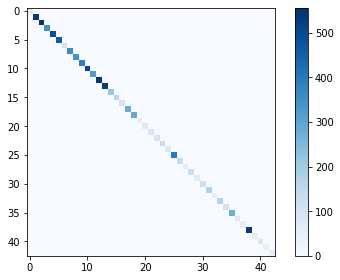

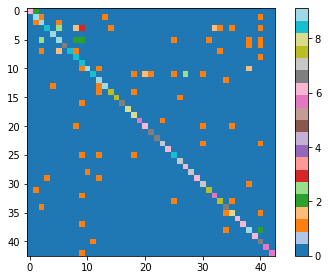

In [33]:
N_CLASSES = 43
RESIZED_IMAGE = (32, 32)

import matplotlib.pyplot as plt
import glob
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple
import numpy as np
np.random.seed(101)
%matplotlib inline

Dataset = namedtuple('Dataset', ['X', 'y'])

def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_dataset_ppm(rootpath, n_labels, resize_to):
    images = []
    labels = []
  
    for c in range(n_labels):
        full_path = rootpath + '/' + format(c, '05d') + '/'
        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)
            img = rgb2lab(img / 255.0)[:,:,0]
        
            if resize_to:
                img = resize(img, resize_to, mode='reflect')
      
            label = np.zeros((n_labels, ), dtype=np.float32)
            label[c] = 1.0
      
            images.append(img.astype(np.float32))
            labels.append(label)
    return Dataset(X = to_tf_format(images).astype(np.float32), y = np.matrix(labels).astype(np.float32))

dataset = read_dataset_ppm('data/GTSRB/Final_Training/Images', N_CLASSES, RESIZED_IMAGE)

from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(range(dataset.X.shape[0]), test_size=0.25, random_state=101)
X_train = dataset.X[idx_train, :, :, :]
X_test = dataset.X[idx_test, :, :, :]
y_train = dataset.y[idx_train, :]
y_test = dataset.y[idx_test, :]



def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0]
    n_samples = X.shape[0]
  
    if shuffle:
        idx = np.random.permutation(n_samples)
    else:
        idx = list(range(n_samples))
  
    for k in range(int(np.ceil(n_samples/batch_size))):
        from_idx = k*batch_size
        to_idx = (k+1)*batch_size
        yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :]


import tensorflow as tf

def fc_no_activation_layer(in_tensors, n_units):
    w = tf.get_variable('fc_W', [in_tensors.get_shape()[1], n_units], tf.float32, tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('fc_B', [n_units, ], tf.float32, tf.constant_initializer(0.0))
    return tf.matmul(in_tensors, w) + b

def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units))

def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], [1, sampling, sampling, 1], 'SAME')
  
def conv_layer(in_tensors, kernel_size, n_units):
    w = tf.get_variable('conv_W', [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units], tf.float32, tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('conv_B', [n_units, ], tf.float32, tf.constant_initializer(0.0))
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, w, [1, 1, 1, 1], 'SAME') + b)

def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda: tf.nn.dropout(in_tensors, keep_proba), lambda: in_tensors)

  
def model(in_tensors, is_training):
    # First layer: 5x5 2d-conv, 32 filters, 2x maxpool, 20% drouput
    with tf.variable_scope('l1'):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
  
      # Second layer: 5x5 2d-conv, 64 filters, 2x maxpool, 20% drouput
    with tf.variable_scope('l2'):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)
    
    with tf.variable_scope('flatten'):
        l2_out_flat = tf.layers.flatten(l2_out)
  
    # Fully collected layer, 1024 neurons, 40% dropout 
    with tf.variable_scope('l3'):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
  
    # Output
    with tf.variable_scope('out'):
        out_tensors = fc_no_activation_layer(l3_out, N_CLASSES)
  
    return out_tensors



from sklearn.metrics import classification_report, confusion_matrix

def train_model(X_train, y_train, X_test, y_test, learning_rate, max_epochs, batch_size):
    in_X_tensors_batch = tf.placeholder(tf.float32, shape = (None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
    in_y_tensors_batch = tf.placeholder(tf.float32, shape = (None, N_CLASSES))
    is_training = tf.placeholder(tf.bool)

    logits = model(in_X_tensors_batch, is_training)
    out_y_pred = tf.nn.softmax(logits)
    loss_score = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=in_y_tensors_batch)
    loss = tf.reduce_mean(loss_score)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        for epoch in range(max_epochs):
            print("Epoch=", epoch)
            tf_score = []
      
            for mb in minibatcher(X_train, y_train, batch_size, shuffle = True):
                tf_output = session.run([optimizer, loss], feed_dict = {in_X_tensors_batch : mb[0], in_y_tensors_batch : mb[1], is_training : True})
                tf_score.append(tf_output[1])
        
            print(" train_loss_score=", np.mean(tf_score))
    
        # after the training is done, time to test it on the test set
        print("TEST SET PERFORMANCE")
        y_test_pred, test_loss  = session.run([out_y_pred, loss], feed_dict = {in_X_tensors_batch : X_test, in_y_tensors_batch : y_test,   is_training : False})
        print(" test_loss_score=", test_loss)
        y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
        y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
        print(classification_report(y_test_true_classified, y_test_pred_classified))

        cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)

        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        plt.tight_layout()
        plt.show()
    
        # And the log2 version, to enphasize the misclassifications
        plt.imshow(np.log2(cm + 1), interpolation='nearest', cmap=plt.get_cmap("tab20"))
        plt.colorbar()
        plt.tight_layout()
        plt.show()

from sklearn.metrics import classification_report
tf.reset_default_graph()
train_model(X_train, y_train, X_test, y_test, 0.001, 10, 256)